In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [44]:
#1: Business Understanding:

#Black Friday dataset is about holiday shopping season at last friday in November. 

# the goal is to exploare the dataset to get know what is really happening.

# the task questions are:

# Question 1: what are the top products that have been purchased?

# Question 2: what are the top customers that spend more maney in Black Friday?

# Question 3: which age and gender that made purchese?

# Question 4: what are the correlation between all the columns in the dataset?

# getting the answer for these four questions can help sellers to make decisions on what products to make advertise.



In [45]:
# loading the data

# read all data and store it in black_friday_data variable
black_friday_data = pd.read_csv('./BlackFriday.csv')


In [46]:
#2: understand the data

#show some of the data to get an idea how it looks like
display(black_friday_data.head())

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [47]:
# get to know the data type of each column in the data
black_friday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [48]:
# view the shape of the data
display(black_friday_data.shape)

(537577, 12)

In [49]:
#3: prepare the Data:

#1. check how many missing values and deal with missing values
#2. use One-Hot-Encoding for categorical columns such as Gender, Age, City_Category, and Stay_in_Current_City_Years


In [50]:
#: Data preparation

#checking how many missing values in the dataset.

black_friday_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [51]:
# only have missing values in two columns; Product_Category_2 and Product_Category_3

# since the vlaues are NaN, it means that customer did not buy anything from these categories, 
#so I will need to replace NaN values to zero

In [52]:
# fill the missing values with zero
black_friday_data.fillna(0)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871


In [53]:
# One-Hot Encoding the categorical variables such as Gender, Age, City_Category, and Stay_in_Current_City_Years

encoder = LabelEncoder()

black_friday_data['Gender_Encode'] = encoder.fit_transform(black_friday_data['Gender'].astype(str))
black_friday_data['Age_Encode'] = encoder.fit_transform(black_friday_data['Age'].astype(str))
black_friday_data['City_Category_Encode'] = encoder.fit_transform(black_friday_data['City_Category'].astype(str))
black_friday_data['Stay_In_Current_City_Years_Encode'] = encoder.fit_transform(black_friday_data['Stay_In_Current_City_Years'].astype(str))



In [54]:
#lets check the eccoded columns
display(black_friday_data.head(n=5))

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_Encode,Age_Encode,City_Category_Encode,Stay_In_Current_City_Years_Encode
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,0,0,0,2
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0,0,0,2
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,0,0,0,2
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,0,0,0,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,1,6,2,4


In [56]:
# I want to know how many customers in the dataset
len(black_friday_data.User_ID.unique())

5891

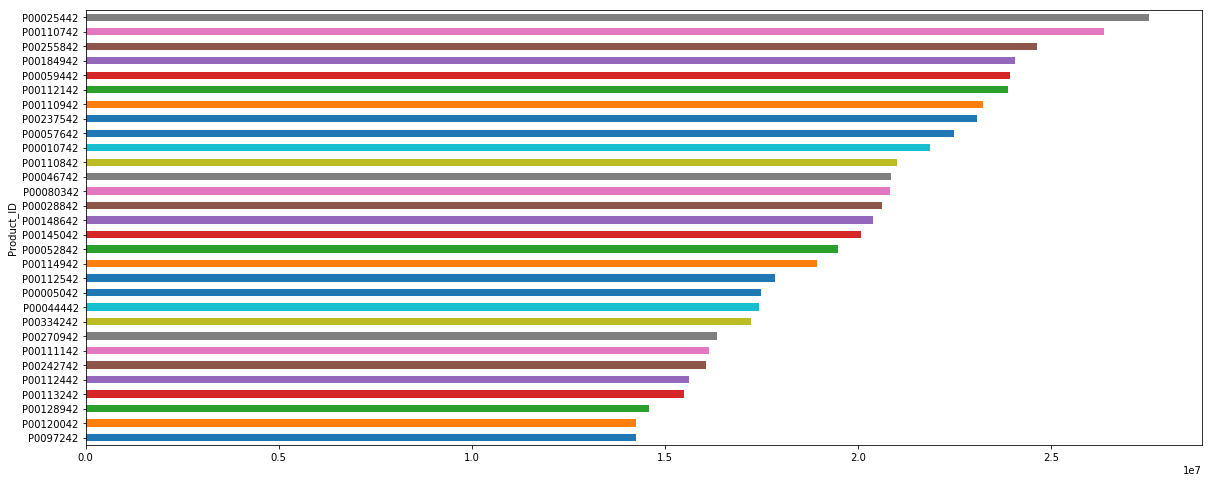

In [39]:
# Question 1: what are the top products that have been purchased?

plt.figure(figsize = (20,8))
black_friday_data.groupby('Product_ID')['Purchase'].sum().nlargest(30).sort_values().plot('barh')

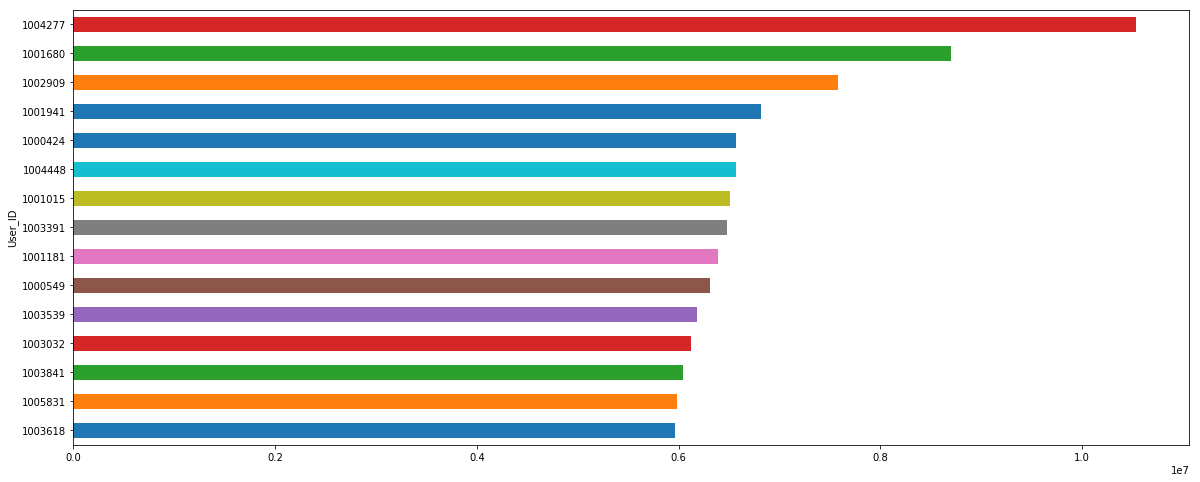

In [17]:
# Question 2: what are the top customers that spend more maney in Black Friday?

plt.figure(figsize = (20,8))
black_friday_data.groupby('User_ID')['Purchase'].sum().nlargest(15).sort_values().plot('barh')

In [57]:
#plt.figure(figsize = (20,8))
#sns.countplot(black_friday_data['Age'])

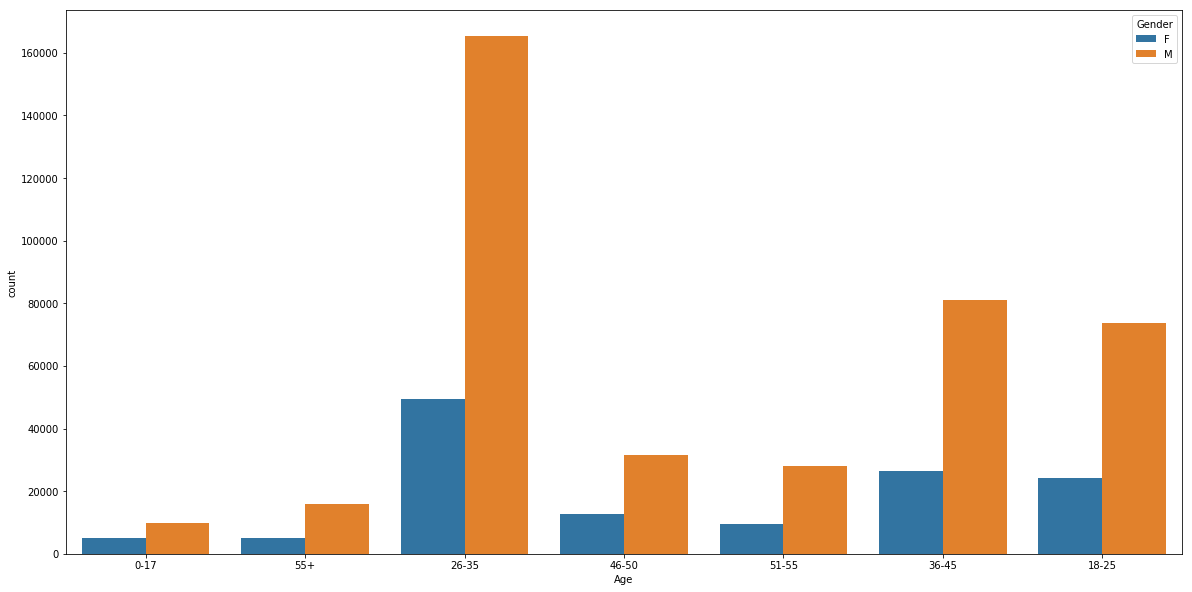

In [58]:
# Question 3: which age and gender that made purchese?

plt.figure(figsize = (20,10))
sns.countplot(black_friday_data['Age'], hue=black_friday_data['Gender'])

In [20]:
# list all the columns in the dataset
black_friday_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_Encode',
       'Age_Encode', 'City_Category_Encode',
       'Stay_In_Current_City_Years_Encode'],
      dtype='object')

In [59]:

#correlation_dataset = black_friday_data[['Occupation',
      # 'Marital_Status', 'Product_Category_1',
       #'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_Encode',
       #'Age_Encode', 'City_Category_Encode',
       #'Stay_In_Current_City_Years_Encode']]
#correlation_dataset.corr()

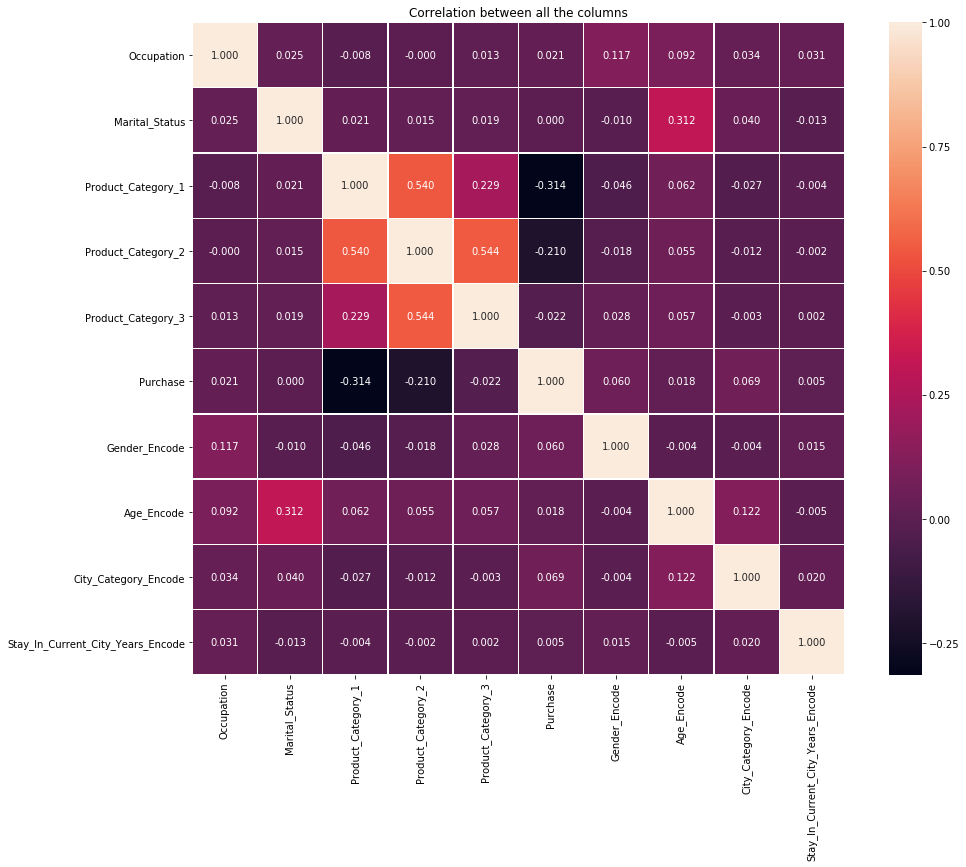

In [67]:
# visulize the correlation by using heatmap

# Question 4: what are the correlation between all the columns in the dataset?


correlation_dataset = black_friday_data[['Occupation',
       'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_Encode',
       'Age_Encode', 'City_Category_Encode',
       'Stay_In_Current_City_Years_Encode']]

plt.figure(figsize=(16,12))
plt.title('Correlation between all the columns')
sns.heatmap(correlation_dataset.corr(), linewidths=0.3, square=True,
            annot=True, fmt='.3f');

In [ ]:
#from the heatmap I can tell about the correlation between the columns:

#'Occupation' highest correlation with Gender_Encode
#'Marital_Status', highest correlation with Age_Encode
#'Product_Category_1' highest correlation with Product_Category_2
#'Product_Category_2' highest correlation with Product_Category_3
#'Product_Category_3' highest correlation with Product_Category_2
#'Purchase' highest correlation with City_Category_Encode
#'Gender_Encode' highest correlation with Occupation
# 'Age_Encode' highest correlation with Marital_Status
#'City_Category_Encode' highest correlation with Age_Encode
#'Stay_In_Current_City_Years_Encode' highest correlation with Occupation